# How can we build a machine learning model in Python to accurately predict whether a loan application will be approved or rejected using applicants’ demographic, financial, and credit history data?

In [67]:
import pandas as pd
import numpy as np

In [69]:
# 📄 Load dataset
data = pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\sudents and projects\S2\Classification\train_u6lujuX_CVtuZ9i (1) 6.45.01 PM.csv")

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
#preprocessing
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
#dealing with missing values mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed','Loan_Amount_Term','Credit_History']:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\tajud\AppData\Local\Temp\ipykernel_24564\4063909117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [73]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

C:\Users\tajud\AppData\Local\Temp\ipykernel_24564\4230643855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


In [75]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = data.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

ValueError: could not convert string to float: 'LP001002'

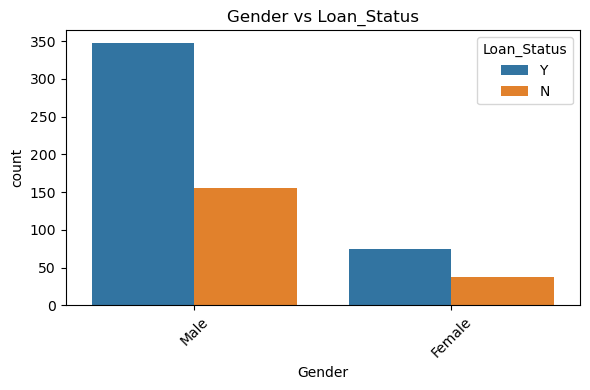

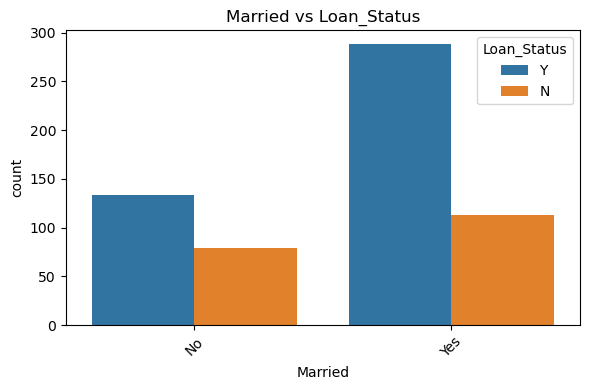

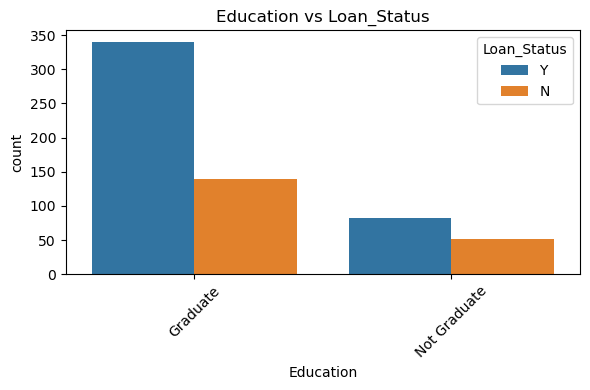

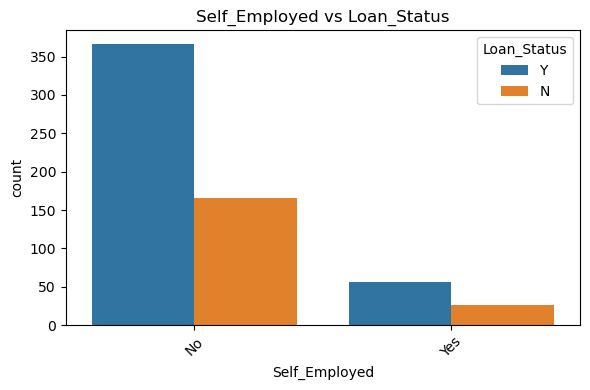

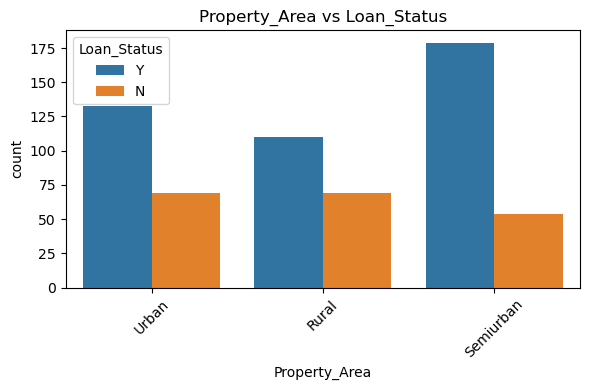

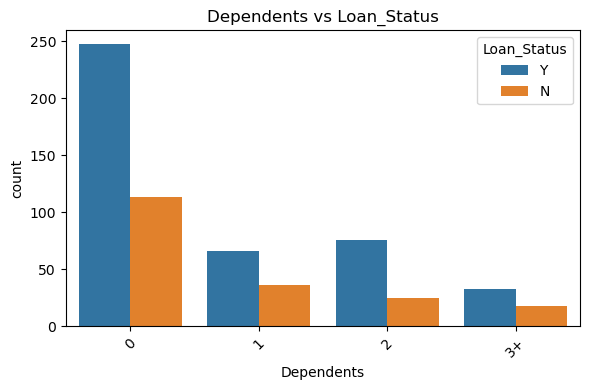

In [81]:
# 4. Categorical Variable Counts
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, hue='Loan_Status')
    plt.title(f"{col} vs Loan_Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

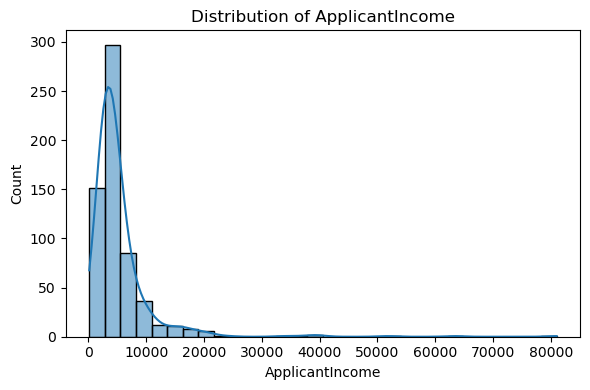

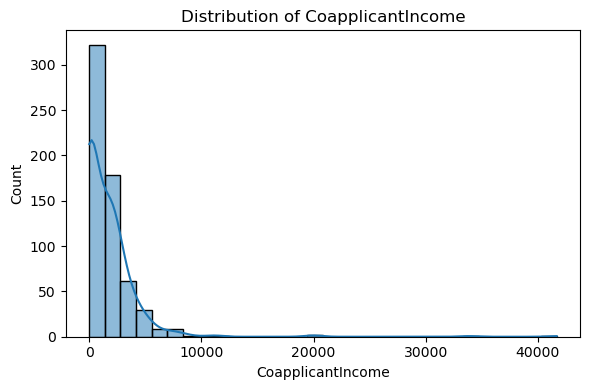

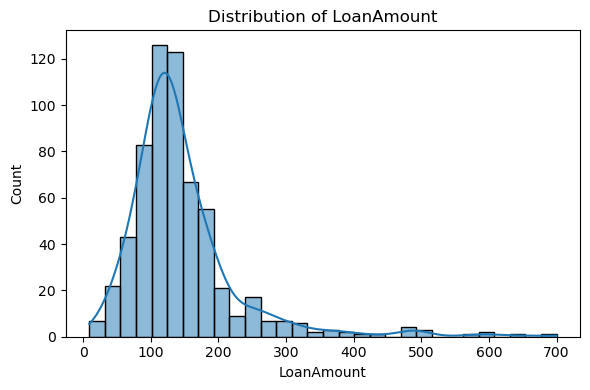

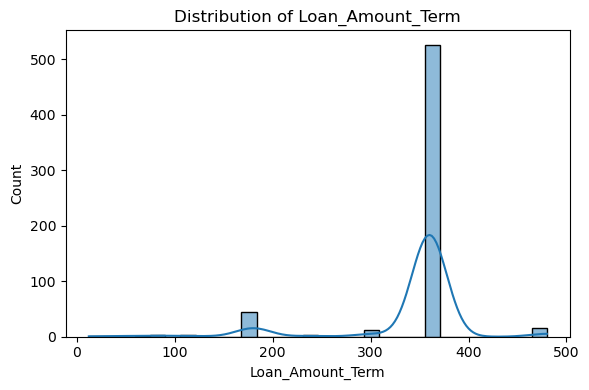

In [83]:
# 5. Numerical Variable Distribution
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

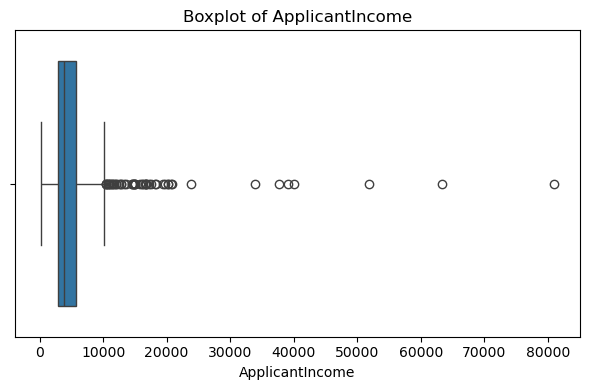

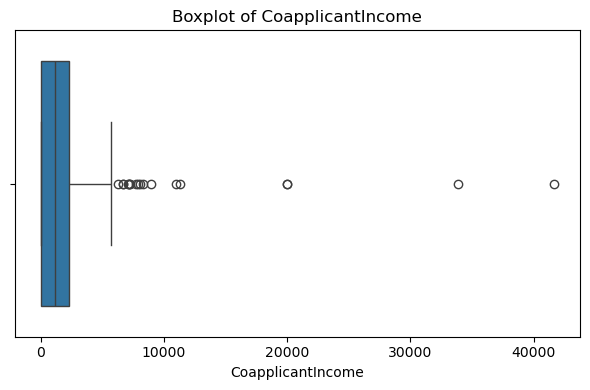

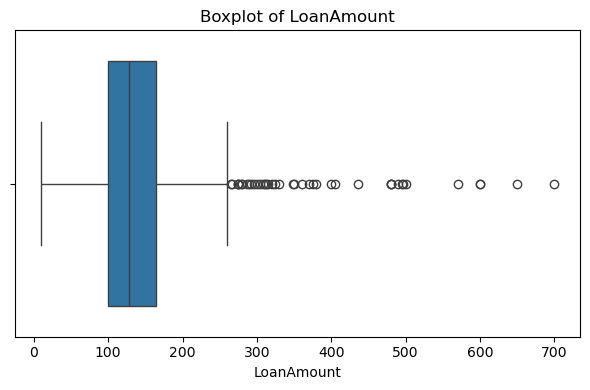

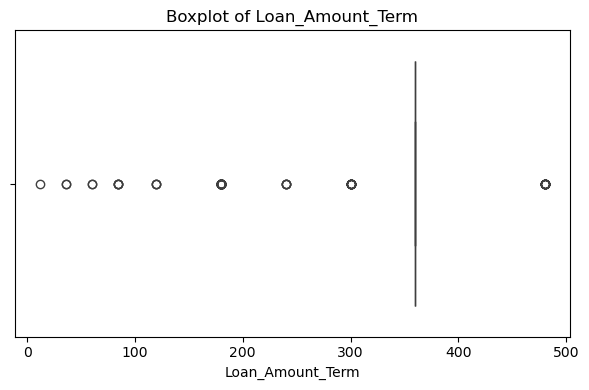

In [85]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [87]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to all relevant categorical columns
for col in ['Loan_ID','Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    data[col] = le.fit_transform(data[col])

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [91]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


In [93]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,-4.339634e-18,4.050325e-17,-2.603780e-17,5.930833e-17,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.627255e+00,-5.132498e+00,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.414462e-01,2.732313e-01,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.112412e-01,2.732313e-01,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,6.414426e-02,2.312023e-01,2.260572e-01,2.732313e-01,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.238462e+01,1.369617e+01,6.595146e+00,2.137276e+00,1.000000,2.000000,1.000000


In [95]:
X = data.drop('Loan_Status', axis=1) # Features
X = data.drop('Loan_ID', axis=1)
y = data['Loan_Status']                # Target

In [99]:
print(y.value_counts())

Loan_Status
1    422
0    192
Name: count, dtype: int64


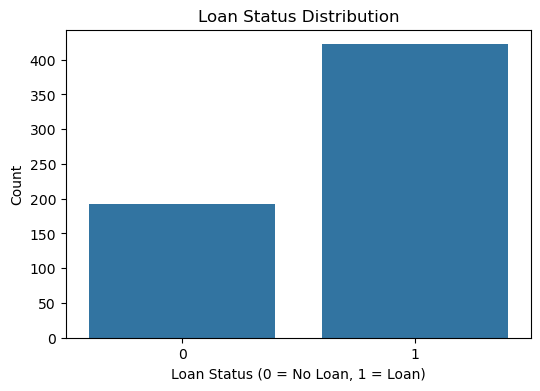

In [101]:
# plot claim status distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = No Loan, 1 = Loan)')
plt.ylabel('Count')
plt.show()

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)  
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  
  
print('After SMOTE class distribution:')  
print(y_train_bal.value_counts())

After SMOTE class distribution:
Loan_Status
0    342
1    342
Name: count, dtype: int64


In [113]:
# 🤖 Train Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
[[43  0]
 [ 0 80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9512195121951219
[[41  2]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.95      0.96        80

    accuracy                           0.95       123
   macro avg       0.94      0.95      0.95       123
weighted avg       0.95      0.95      0.95       123



In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [119]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=42)  # 'rbf' is good for non-linear problems
svm_rbf.fit(X_train_bal, y_train_bal)

y_pred_svm = svm_rbf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [138]:
#kernel=linear
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')  
svm_linear.fit(X_train_bal, y_train_bal)

y_pred_lsvm = svm_linear.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_lsvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lsvm))
print("Classification Report:\n", classification_report(y_test, y_pred_lsvm))

SVM Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [143]:
#kernel=poly
from sklearn.svm import SVC

svm_poly = SVC(kernel='poly', degree=3)  
svm_poly.fit(X_train_bal, y_train_bal)

y_pred_psvm = svm_poly.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_psvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_psvm))
print("Classification Report:\n", classification_report(y_test, y_pred_psvm))

SVM Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [121]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [126]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_bal, y_train_bal)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 1.0
Confusion Matrix:
 [[43  0]
 [ 0 80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



C:\Users\tajud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [128]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train_bal, y_train_bal)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best XGB Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best CV Score: 1.0


In [130]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

best_xgb.fit(X_train_bal, y_train_bal)
y_pred_best_xgb = best_xgb.predict(X_test)

print("✅ Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

✅ Final XGBoost Accuracy: 1.0
✅ Confusion Matrix:
 [[43  0]
 [ 0 80]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        80

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



C:\Users\tajud\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [145]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM (RBF)": accuracy_score(y_test, y_pred_svm),
    "SVM (Linear)": accuracy_score(y_test, y_pred_lsvm),
    "SVM (Poly)": accuracy_score(y_test, y_pred_psvm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_best_xgb)
}

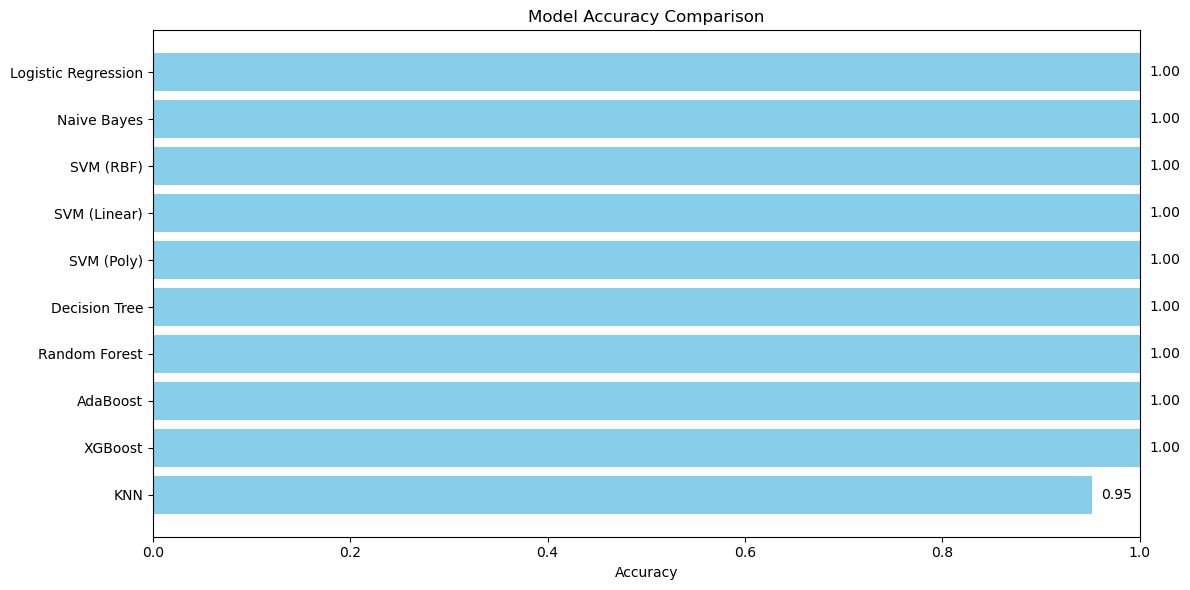

In [147]:
import matplotlib.pyplot as plt

# Sort by accuracy for better visualization
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(list(sorted_accuracies.keys()), list(sorted_accuracies.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
for index, value in enumerate(sorted_accuracies.values()):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.tight_layout()
plt.show()